<hr style="height:2px; background-color: black;">
<div style="text-align: left; display: inline-block; width: 50%;">Vincent Earl Andrews</div><div style="text-align: right; display: inline-block; width: 50%;">Due: February 27, 2024</div>                                           
                                                  
<h3 align="center">Comparative Planetology: Homework 1</h3>
<hr style="height:2px; background-color: black;">

Problem 1:

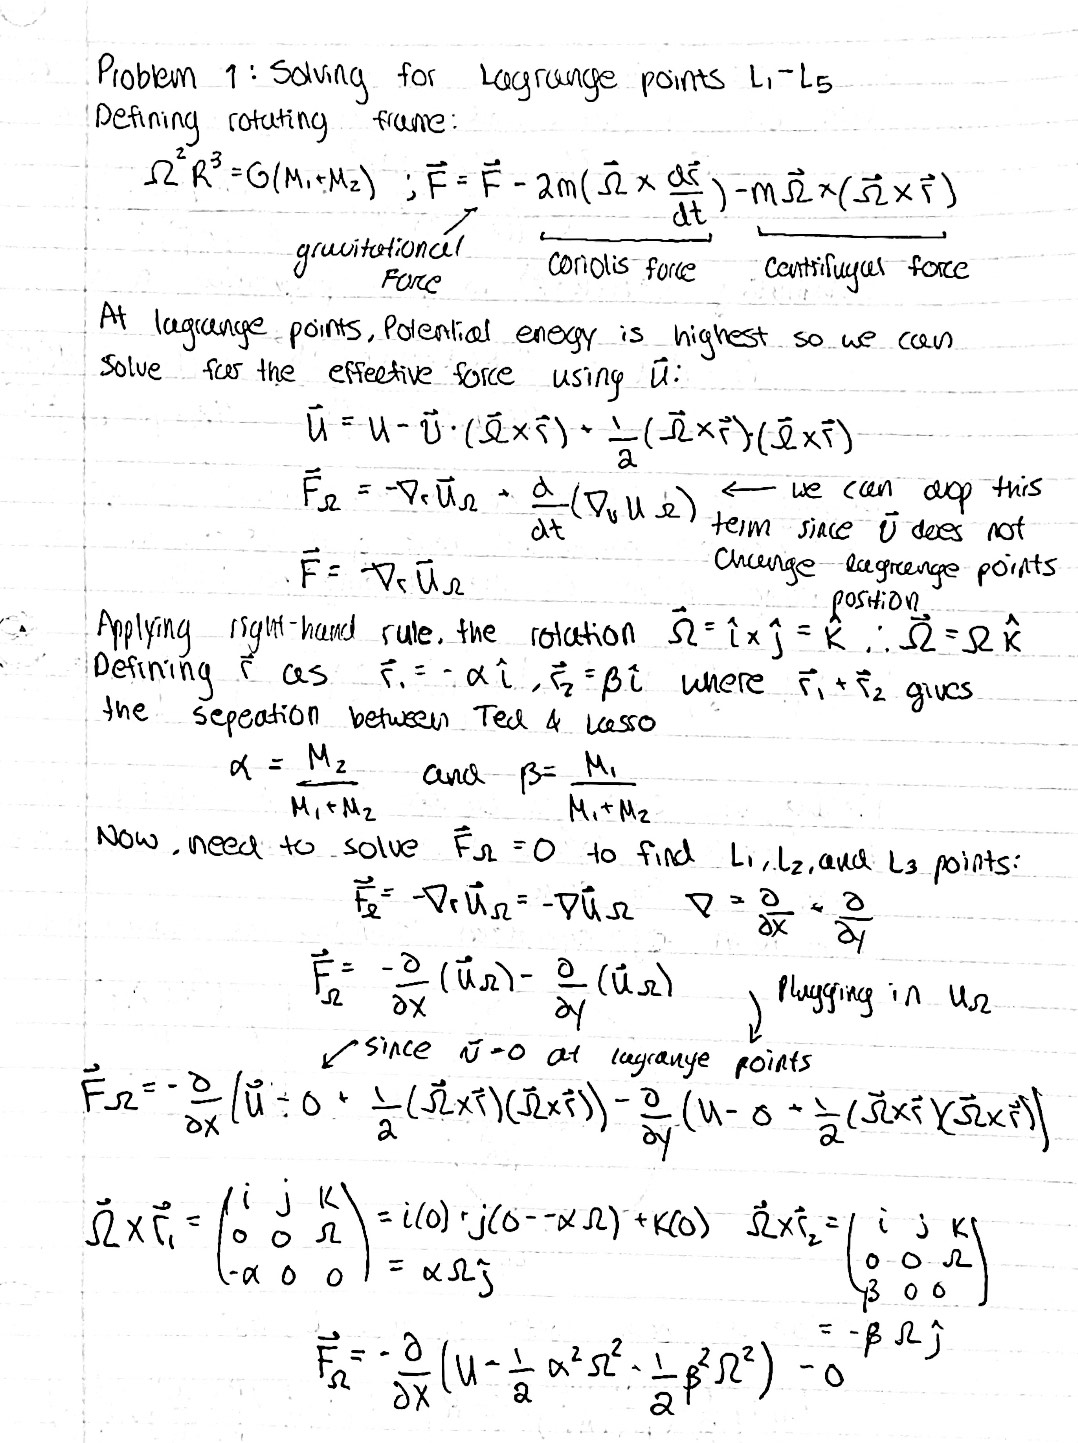

In [65]:
from IPython.display import Image
Image(filename="C:/Users/vince/Downloads/IMG_8487.jpg",width=800, height=400)

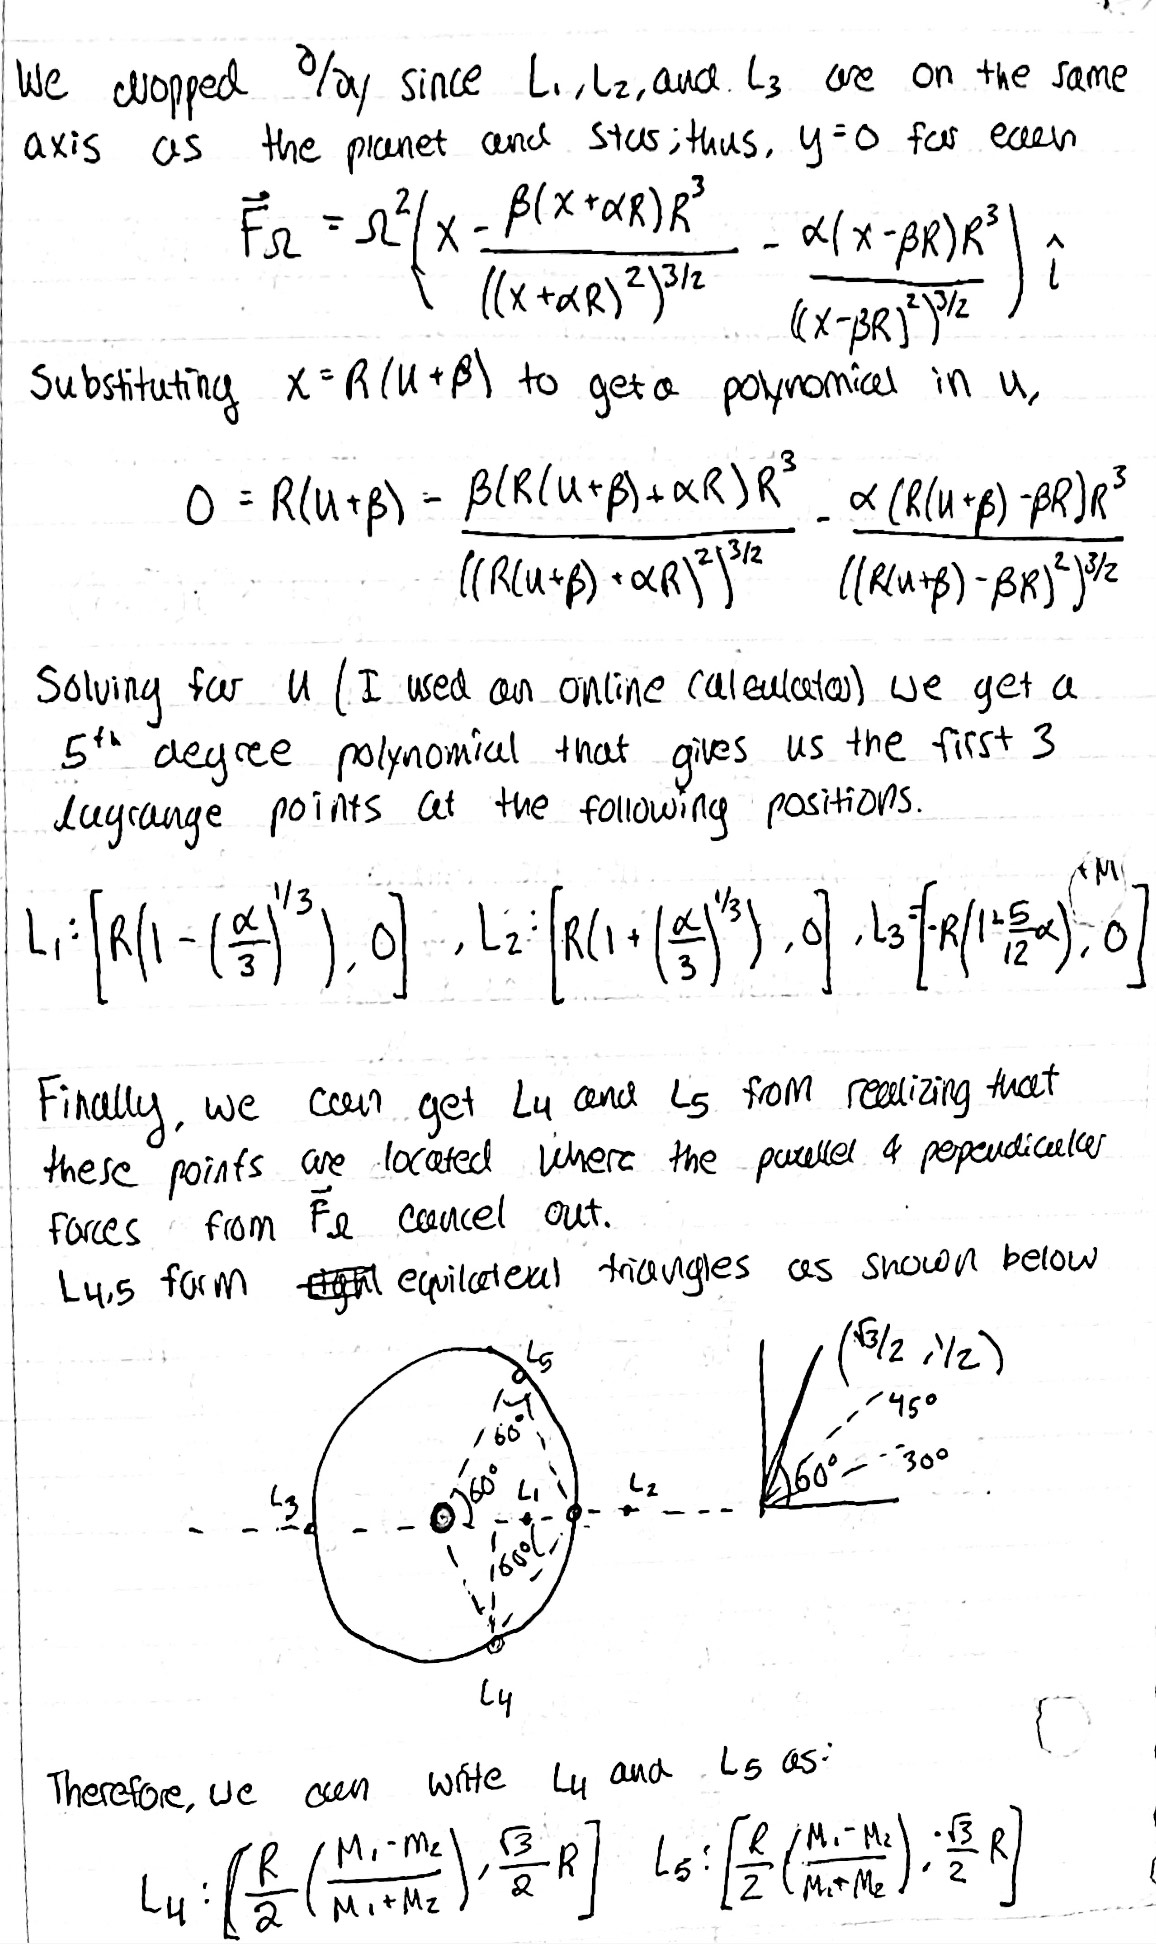

In [66]:
from IPython.display import Image
Image(filename="C:/Users/vince/Downloads/IMG_8488.jpg",width=800, height=400)

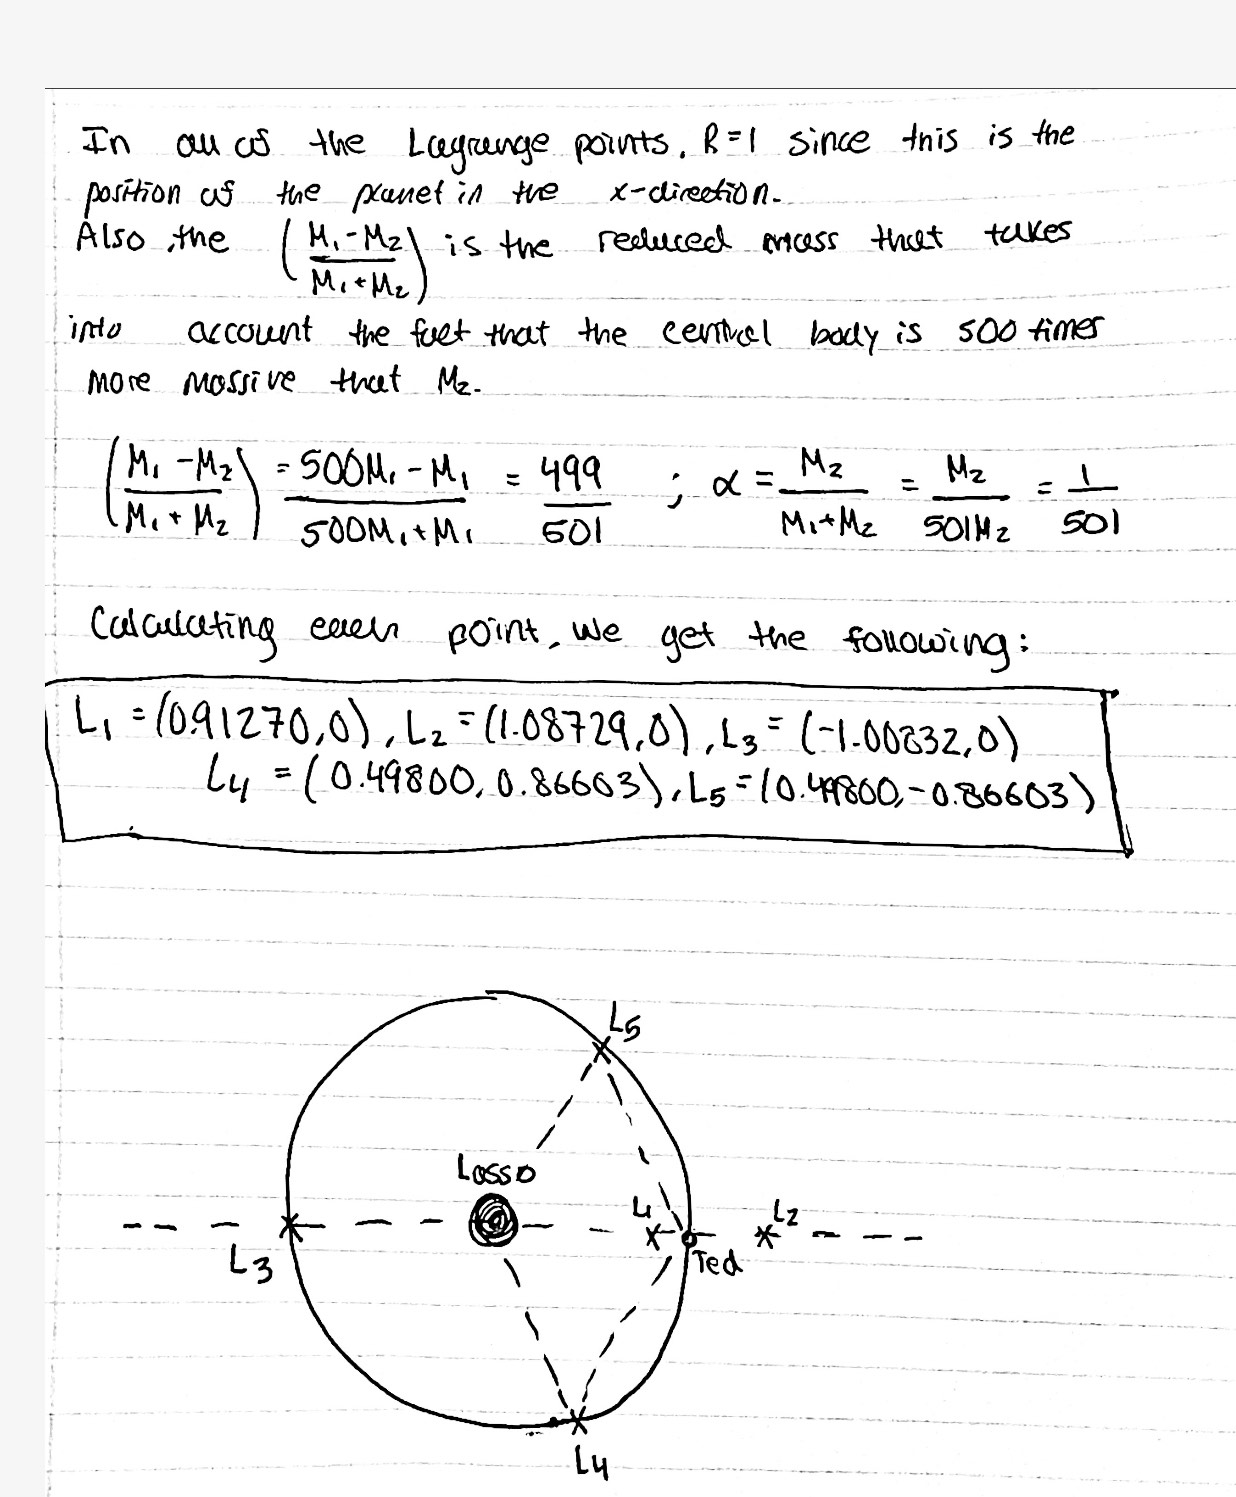

In [67]:
from IPython.display import Image
Image(filename="C:/Users/vince/Downloads/IMG_8489.jpg",width=800, height=400)

Problem 2

Problem 3

Import necessary libraries and define constants for mass and radii

In [41]:
import astropy.constants as c
import astropy.units as u # ensures we have the right units in calculations
from math import pi
from sympy import symbols, Eq, solve

# define constants
R_Moon = 1738.1 * u.km
M_Moon = 0.07346e24 * u.kg 
R_Earth_Moon = 0.3844e6 * u.km # initial Earth to Moon distance
P_Moon = 27.3217 * u.day 
M_Earth = 5.972e24 * u.kg
R_Earth = 6371 * u.km
P_Earth = u.day

In [42]:
# moment of inertia function
def moment_of_inertia(i, M, R):
    '''
    Calculates the moment of inertia of a spherical body:
    i = moment of inertia factor
    M = mass
    R = radius
    '''
    return i * M * R**2
    
# angular momentum function
def angular_momentum(I,P):
    '''
    Calculates the angular momentum for each orbit:
    I = moment of inertia value 
    P = orbital period
    '''
    return (2 * pi * I) / P

We need to consider 3 frames of reference in order to determine when the Earth and Moon are tidally locked: The Earth, The Moon, and the orbit of the Moon around the Earth.

In [43]:
# the Earth's frame of reference
I_Earth = moment_of_inertia(0.33, M_Earth, R_Earth)
L_Earth = angular_momentum(I_Earth, P_Earth)

# the Moon's frame of reference 
I_Moon = moment_of_inertia(0.39, M_Moon, R_Moon)
L_Moon = angular_momentum(I_Moon, P_Moon)

# Moon's orbit around Earth
I_orbit = moment_of_inertia(1, M_Moon, R_Earth_Moon)
L_orbit = angular_momentum(I_orbit, P_Moon)

In [45]:
# total angular momnetum is the sum of each
L_initial = L_Earth + L_orbit + L_Moon

The contribution from $L_{orbit}$ is greater than the angular momentum from the Moon and Earth individually. Since angular momentum should be conserved, we can set $L_1$ equal tot he final L, where the period is the same since the Moon and Earth are tidally locked. 

We can write $L_2$ as the following where we need to solve for $P_{new}$ and $R_{new}$:
\begin{align}
    L_2 = \frac{2\pi}{P_{new}} \left(I_{Earth} + I_{Moon} + (M_{Moon} * R_{new}^2\right)
\end{align}

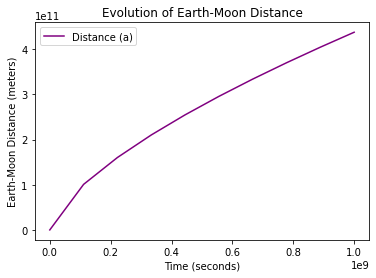

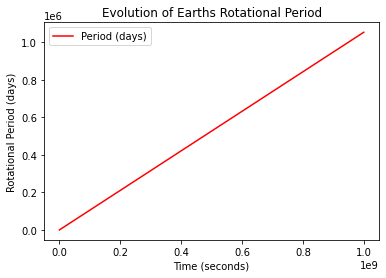

In [152]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
G = 6.6743e-11  # Gravitational constant (m^3 kg^-1 s^-2)
m_earth = 5.972e24  # Mass of Earth (kg)
m_moon = 7.342e22  # Mass of Moon (kg)
R_earth_moon_initial = 384400e3  # Initial Earth-Moon distance (m)

# Q is between 100-300
k = 0.3  # Tidal Love number
Q = 100  # Specific dissipation factor

def tidal_locking_equation(y, t):
    a = y[0]
    Omega_earth = 2 * np.pi / (24 * 60 * 60)  # Earth's initial angular frequency (rad/s)
    omega_moon = 2 * np.pi / (27.3 * 24 * 60 * 60)  # Moon's initial angular speed (rad/s)

    # change in seperation wrt time
    dadt = (3 * k / Q) * (((G**2 * m_moon * R_earth_moon_initial**5) / (m_earth * a))**0.5) * \
           ((Omega_earth - omega_moon) / np.abs(Omega_earth - omega_moon))
    return dadt

# Time values
time_array_initial = np.linspace(1, 1e9, 10)

# Solve using odeint
solution_initial = odeint(tidal_locking_equation, [R_earth_moon_initial], time_array_initial)

# Plotting Earth-Moon distance
plt.plot(time_array_initial, solution_initial, color ='purple', label = "Distance (a)")
plt.xlabel('Time (seconds)')
plt.ylabel('Earth-Moon Distance (meters)')
plt.title('Evolution of Earth-Moon Distance')
plt.legend()
plt.show()


def period(a):
    return (2 * pi * np.sqrt(a**3 / (G * m_earth))) / 86400

period_change = [period(i) for i in solution_initial]

plt.plot(time_array_initial, period_change, color = 'red', label = "Period (days)")
plt.xlabel("Time (seconds)")
plt.ylabel('Rotational Period (days)')
plt.title('Evolution of Earths Rotational Period')
plt.legend()
plt.show()